## DSP ASSIGNMENT 5

In [1]:
#IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
import cmath
from numpy.fft import fft,ifft
from scipy.signal import fftconvolve
from scipy.fft import rfft,irfft,rfftfreq
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set plot size for all plots
plt.rcParams["figure.figsize"] = (20,6)

In [2]:
#fn for DFT
def DFT(x):
    N=len(x)
    n=np.arange(N)
    k=n.reshape((N,1))
    e=np.exp(np.complex(0,-2)*np.pi*k*n/N)
    X=np.dot(e,x)
    return X


## Q1

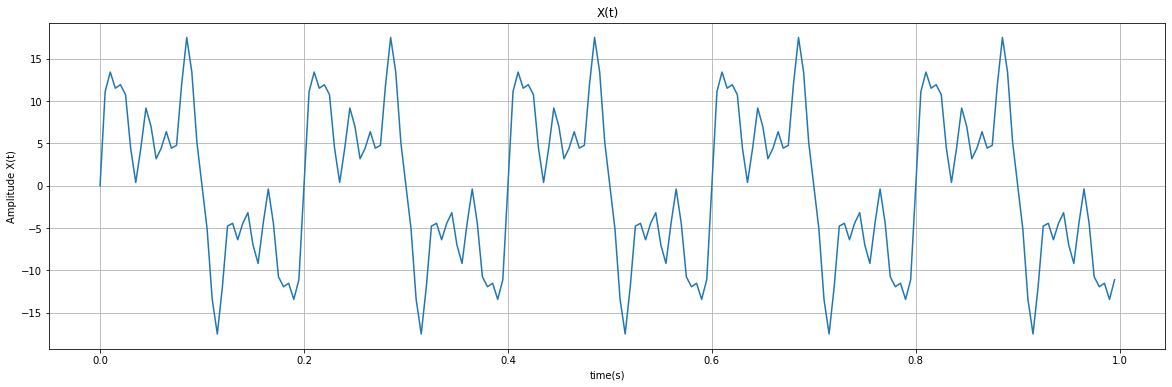

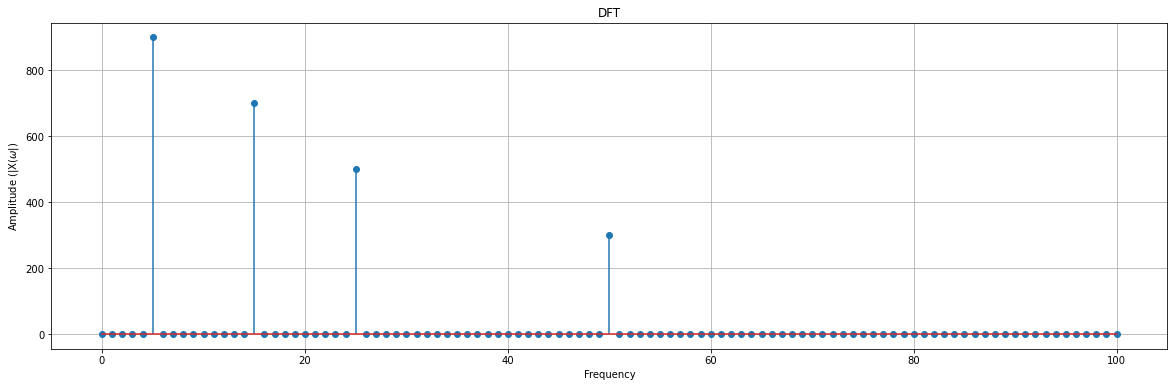

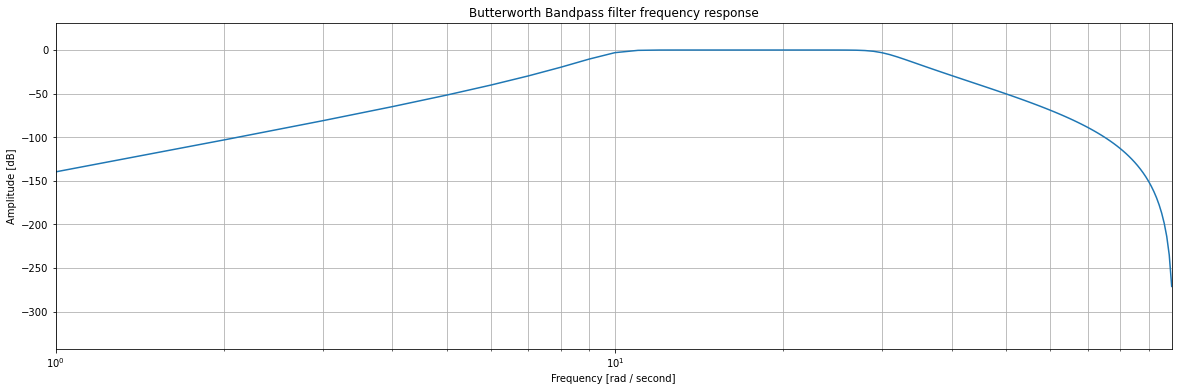

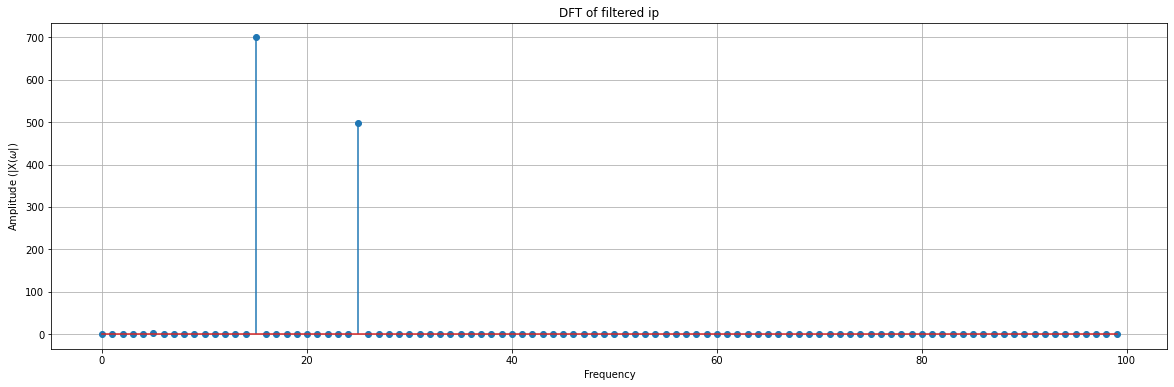

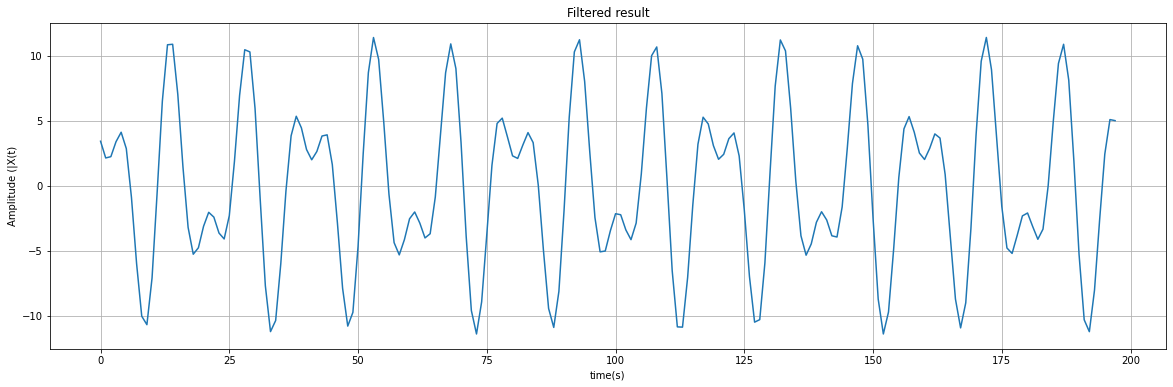

In [3]:
t=np.arange(0,1,1/200)
f1=5
f2=15
f3=25
f4=50

Xt=9*np.sin(2*np.pi*f1*t)+7*np.sin(2*np.pi*f2*t)+5*np.sin(2*np.pi*f3*t)+3*np.sin(2*np.pi*f4*t)
plt.plot(t,Xt)
plt.xlabel('time(s)')
plt.ylabel('Amplitude X(t)')
plt.title('X(t)')
plt.grid()
plt.show()

Xo=rfft(Xt)
plt.stem(abs(Xo))
plt.xlabel('Frequency')
plt.ylabel('Amplitude (|X($\omega$|)')
plt.title('DFT')
plt.grid()
plt.show()

from scipy.signal import butter,lfilter
b, a = signal.butter(6,[10,30],btype='bandpass',analog=False,fs=200)
w, h = signal.freqz(b, a,worN=100)
f = w/(2*np.pi)*200
plt.semilogx(f, 20 * np.log10(abs(h)))
plt.title('Butterworth Bandpass filter frequency response')
plt.xlabel('Frequency [rad / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.margins(0, 0.1)
plt.show()


filt_res=Xo[0:100]*h
plt.stem(abs(filt_res))
plt.xlabel('Frequency')
plt.ylabel('Amplitude (|X($\omega$|)')
plt.title('DFT of filtered ip')
plt.grid()
plt.show()

filteredip=irfft(filt_res)
plt.plot(filteredip)
plt.xlabel('time(s)')
plt.ylabel('Amplitude (|X(t)')
plt.title('Filtered result')
plt.grid()
plt.show()


## Q2

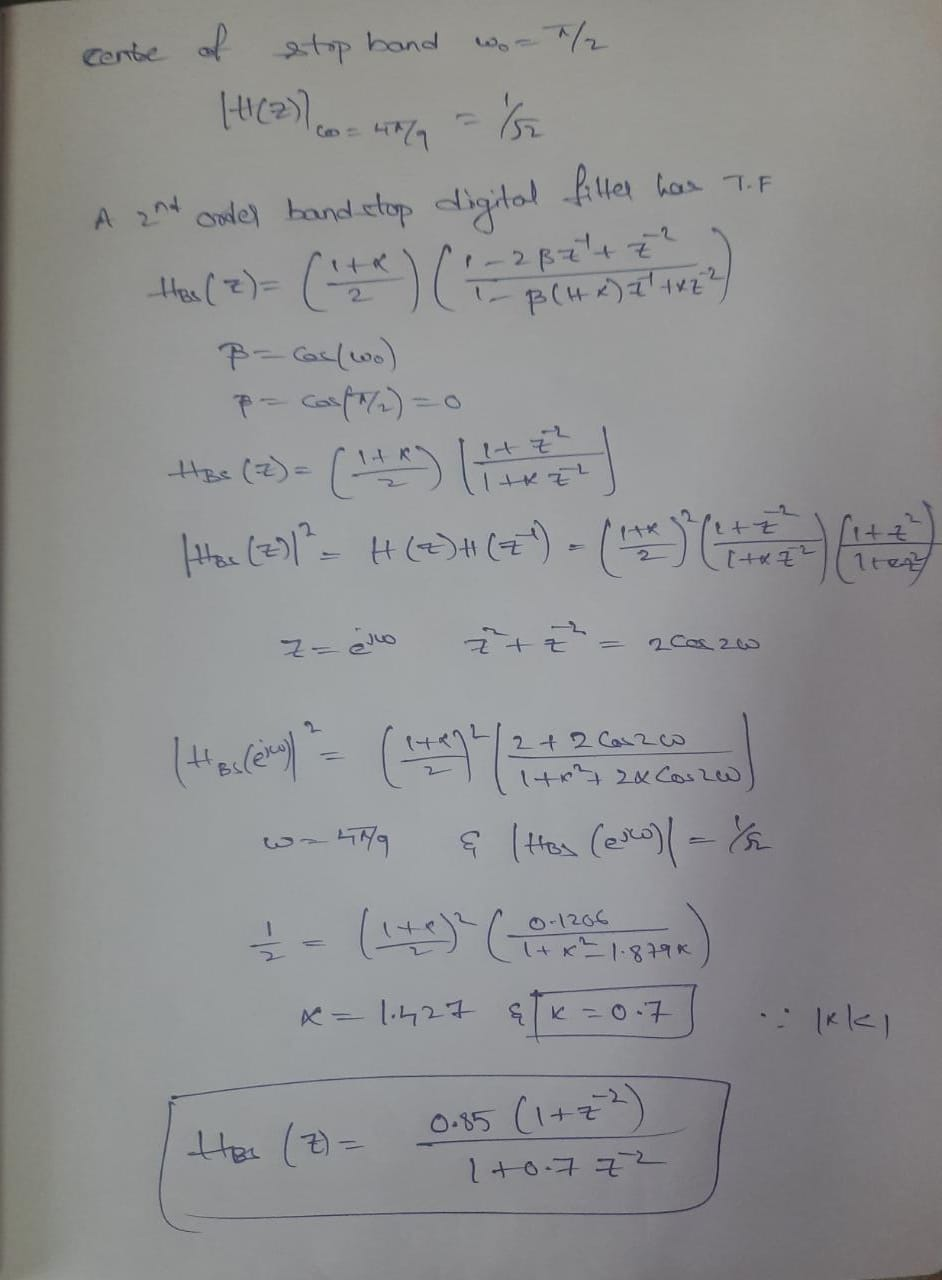

In [4]:
from IPython.display import Image

Image(filename='a5up.jpeg',width=600, height=200)

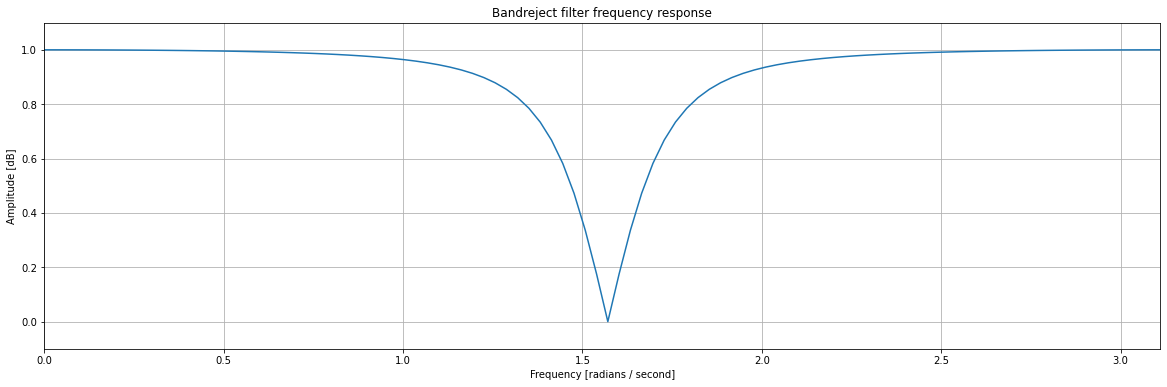

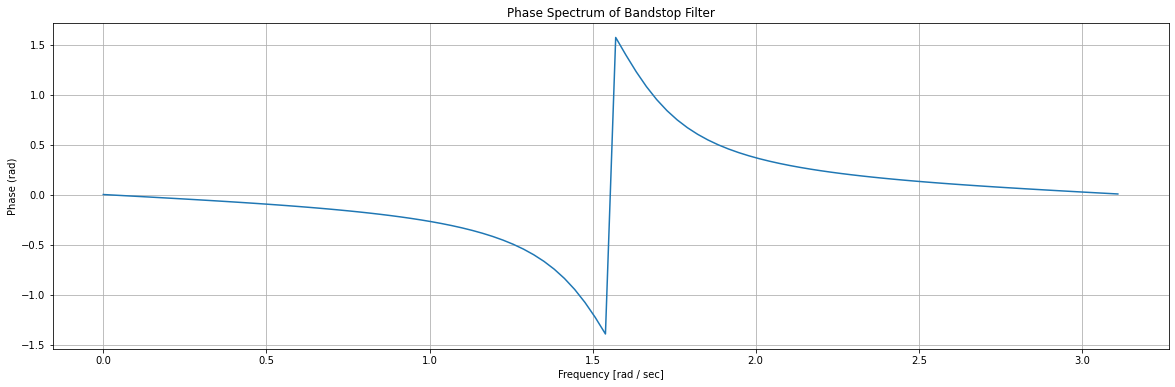

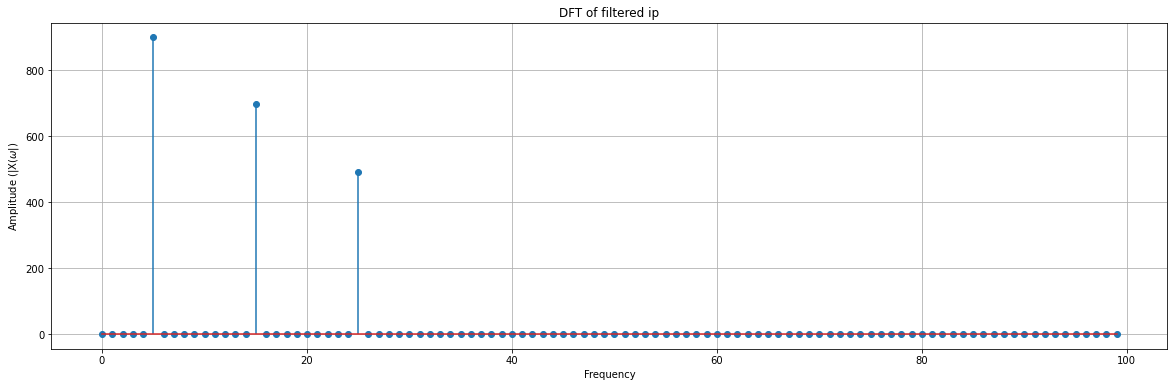

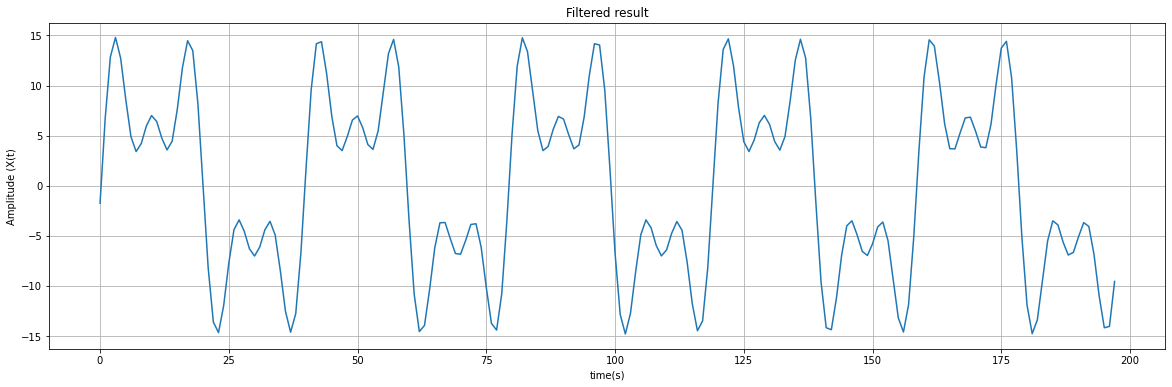

In [18]:
w = np.linspace(0.0,np.pi,101)
b, a = [0.85,0,0.85],[1,0,0.7]
w, h = signal.freqz(b, a,worN=100)
plt.plot(w, (abs(h)))
plt.title('Bandreject filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.margins(0, 0.1)
plt.show()
plt.plot(w,np.angle(h))
plt.title('Phase Spectrum of Bandstop Filter')
plt.xlabel('Frequency [rad / sec]')
plt.ylabel('Phase (rad)')
plt.grid()
plt.show()

filt_res=Xo[0:100]*h
plt.stem(abs(filt_res))
plt.xlabel('Frequency')
plt.ylabel('Amplitude (|X($\omega$|)')
plt.title('DFT of filtered ip')
plt.grid()
plt.show()

filteredip=irfft(filt_res)
plt.plot(filteredip)
plt.xlabel('time(s)')
plt.ylabel('Amplitude (X(t)')
plt.title('Filtered result')
plt.grid()
plt.show()

## Q3

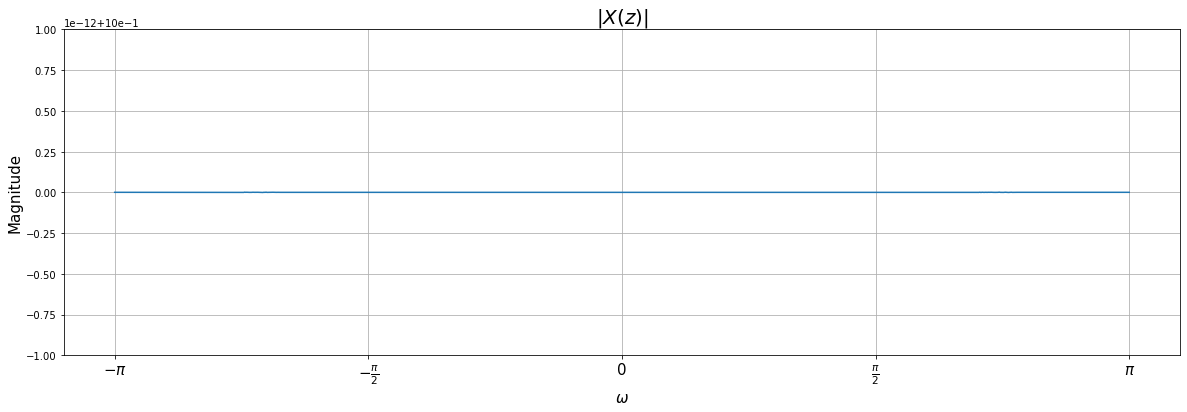

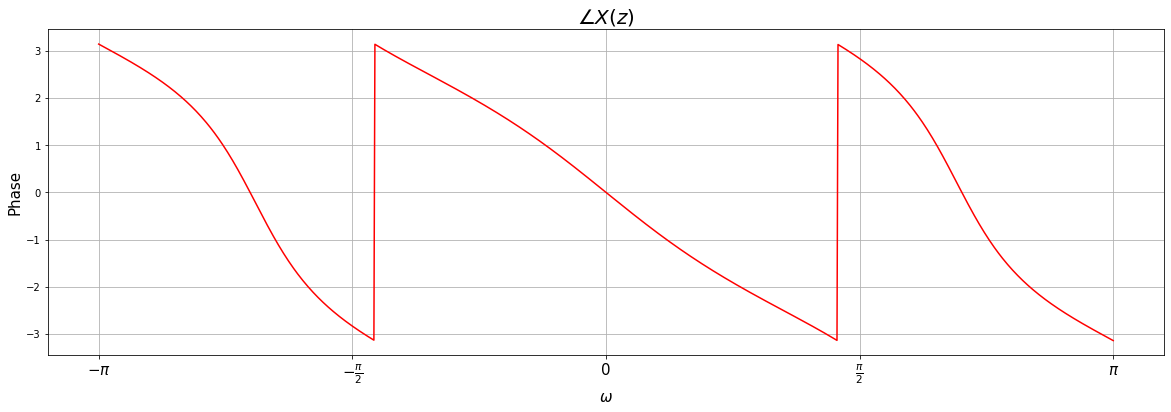

In [6]:
#q7 mag,ph,real,img,omg

q7_omg = np.linspace(-np.pi , np.pi , 1000)
z=np.exp(1j*q7_omg)
num=-0.2+(0.18*np.power(z,-1))+(0.4*np.power(z,-2))+(1*np.power(z,-3))
den=1+(0.4*np.power(z,-1))+(0.18*np.power(z,-2))-(0.2*np.power(z,-3))
q7_z =  num/den 
q7_z_mag = np.abs(q7_z)
q7_z_phs = list(map(lambda x: cmath.phase(x) , q7_z))
q7_z_real=list(map(lambda x: x.real , q7_z))
q7_z_imag=list(map(lambda x: x.imag , q7_z))

#plotting
plt.plot(q7_omg , q7_z_mag)
plt.title(r'$\|X(z)|$' , size= 20)
plt.xlabel('$\omega$' , size = 15 )
plt.ylabel('Magnitude', size = 15 )
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)
plt.grid()
plt.show()


plt.plot(q7_omg , q7_z_phs,'r')
plt.title(r'$\angle X(z)$' , size= 20)
plt.xlabel('$\omega$' , size = 15)
plt.ylabel('Phase', size = 15 )
plt.xticks([-np.pi,-np.pi/2 , 0 , np.pi/2,np.pi] , labels = [r'$-\pi$',r'$-\frac{\pi}{2}$' , '0' , r'$\frac{\pi}{2}$',r'$\pi$'],size = 15)
plt.grid()
plt.show()



In [7]:
b=[-0.2,0.18,0.4,1]
a=[1,0.4,0.18,-0.2]
z,p,g=signal.tf2zpk(b,a)
print('Zeros',z)
print('Poles',p)

Zeros [ 2.5+0.j         -0.8+1.16619038j -0.8-1.16619038j]
Poles [-0.4+0.58309519j -0.4-0.58309519j  0.4+0.j        ]


ALL PASS FILTER since there exist a relation between ZEROS and POLES of the given system. The zeros are inverse of the given poles.

## Q4

$$ H(z) = \frac{0.1321-0.3964z^{-1}+0.3964z^{-2}-0.1321z^{-3}}{1+0.3432z^{-1}+0.6044z^{-2}+0.2041z^{-3}} $$

$$ y(n) = -0.3432y(n-1)-0.6044y(n-2)-0.2041y(n-3)+0.1321x(n)-0.3964x(n-1)+0.3964x(n-2)-0.1321x(n-3) $$

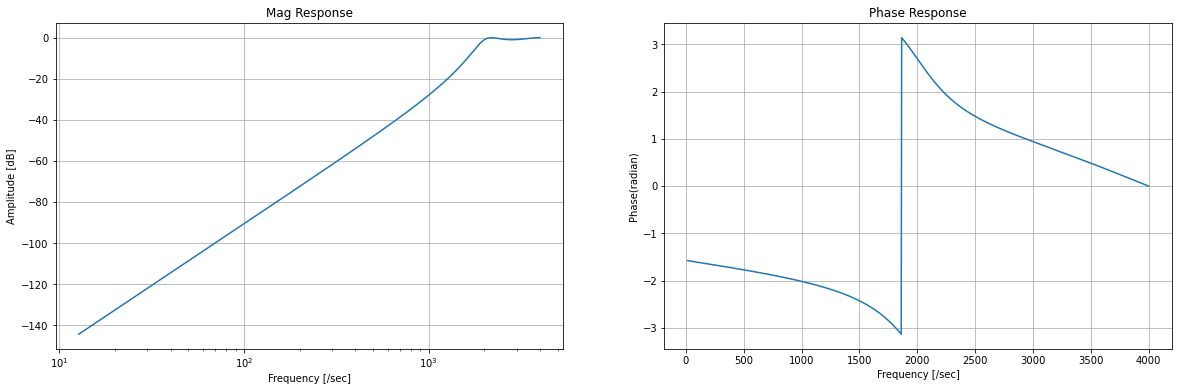

In [8]:
w1 = np.linspace(0.01,np.pi,1000)
f = w1*8000 / (2*np.pi)
z,p=signal.cheby1(N=3,rp=1,Wn=2000,btype='highpass',analog=False,fs=8000)
z,p
w,h=signal.freqz(b=z,a=p,worN=w1)

plt.subplot(121)
plt.semilogx(f, 20 * np.log10(abs(h)))
plt.title('Mag Response')
plt.xlabel('Frequency [/sec]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.subplot(122)
plt.plot(f,np.angle(h))
plt.title('Phase Response')
plt.xlabel('Frequency [/sec]')
plt.ylabel('Phase(radian)')
plt.grid()
plt.show()

In [9]:
poles = np.roots(p)
zeros = np.roots(z)
print('The poles and zeros of given Transfer Function is:',poles,zeros)

The poles and zeros of given Transfer Function is: [-0.00232899+0.77640918j -0.00232899-0.77640918j -0.33853523+0.j        ] [1.00000657+0.00000000e+00j 0.99999671+5.69145455e-06j
 0.99999671-5.69145455e-06j]


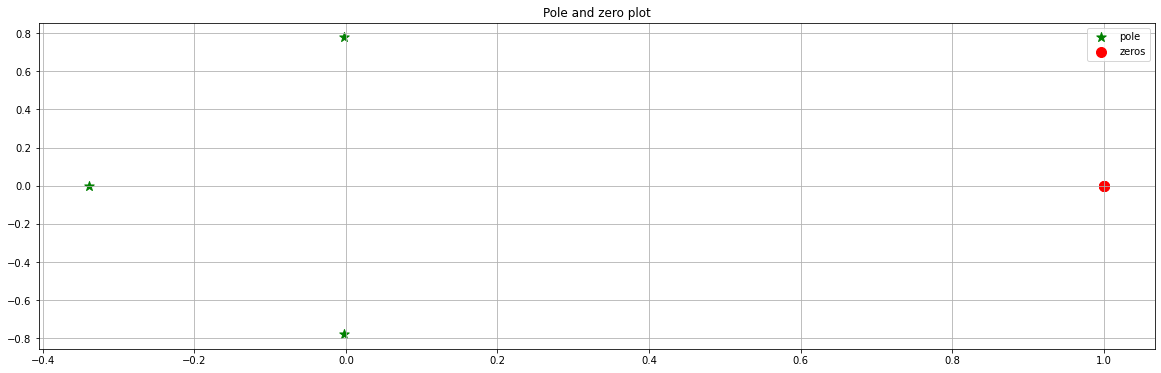

In [10]:
plt.scatter(poles.real,poles.imag,marker="*",s=100,label='pole',c='g')
plt.scatter(zeros.real,zeros.imag,marker="o",s=100,label='zeros',c='r')
plt.title('Pole and zero plot')
plt.grid()
plt.legend()
plt.show()

## Q5

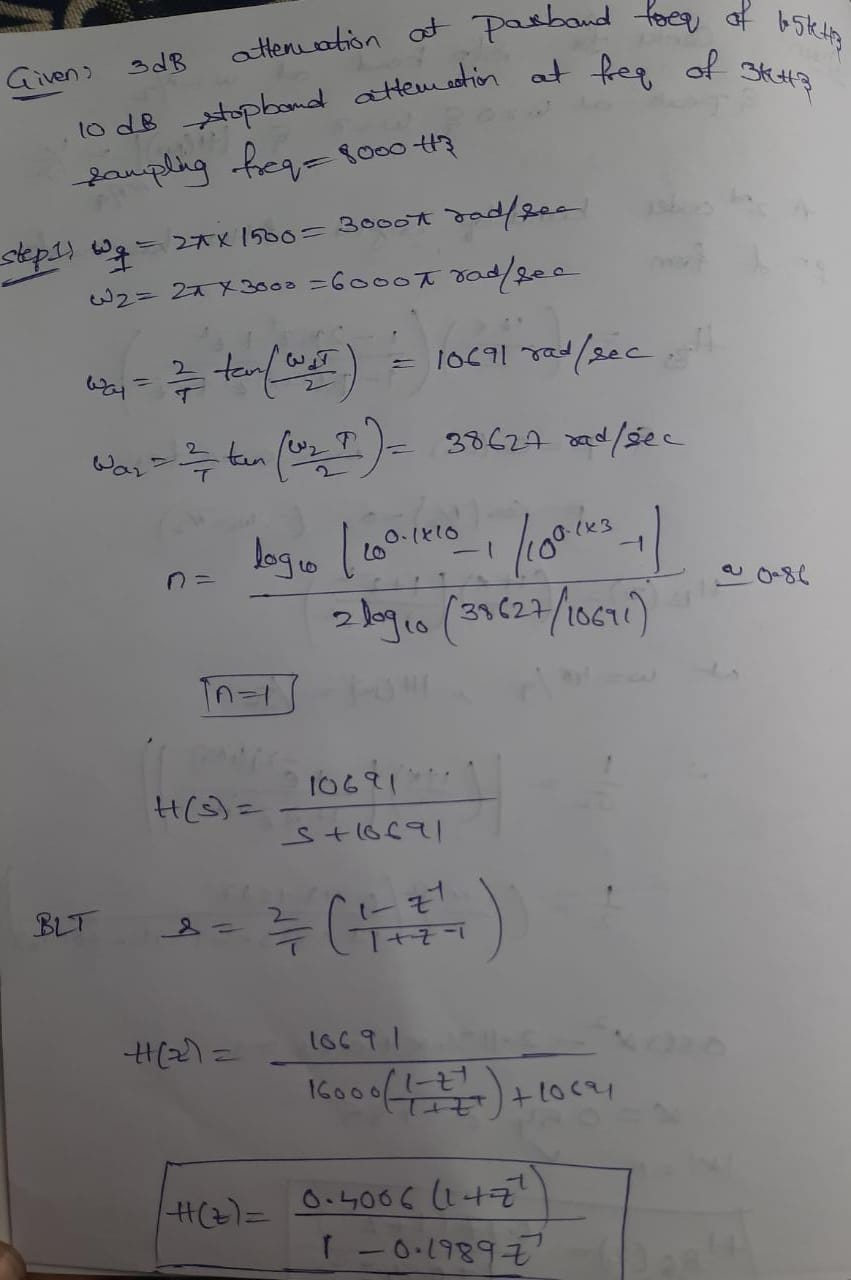

In [11]:
from IPython.display import Image

Image(filename='a5c.jpeg',width=600, height=200)

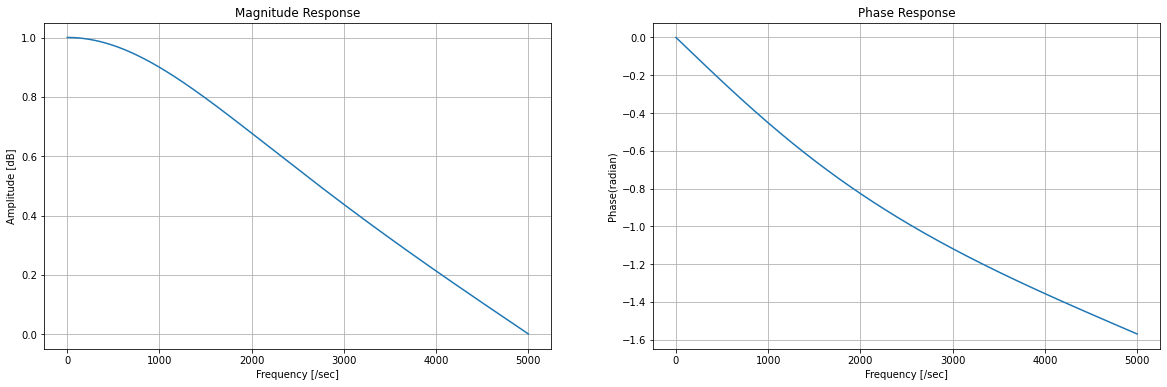

In [12]:
b = [1,-0.1989]
a = [0.4006,0.4006]
freq = np.linspace(0,5000,1000)
lp = np.zeros(1000)

w,h = signal.freqz(a,b,worN=1000)
plt.subplot(121)
plt.plot(freq,(abs(h)))
plt.title('Magnitude Response')
plt.xlabel('Frequency [/sec]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.subplot(122)
plt.plot(freq,np.angle(h))
plt.title('Phase Response')
plt.xlabel('Frequency [/sec]')
plt.ylabel('Phase(radian)')
plt.grid()
plt.show()

## Q6

0:00:00.031065
0:00:00.000254


Text(0.5, 1.0, 'DFT computation time using in-built function')

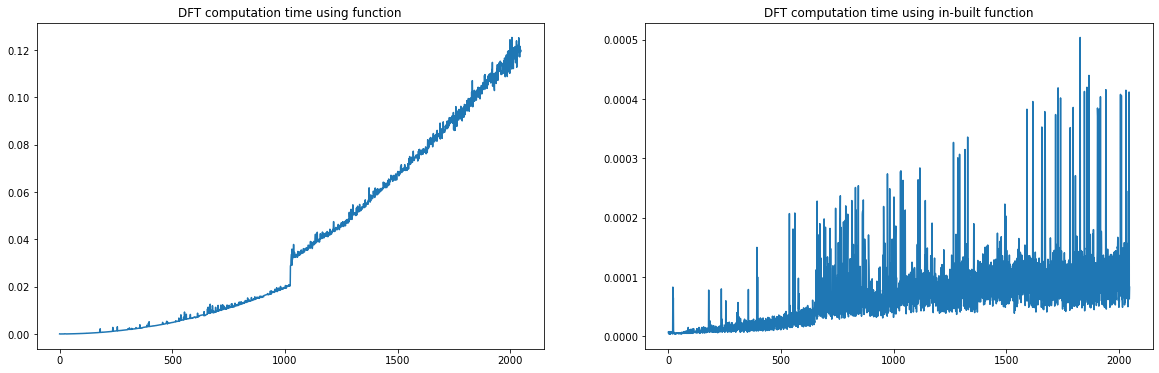

In [13]:
from datetime import datetime
x6=np.random.randint(low=0,high=20,size=1024)
begintime=datetime.now()
DFT_x6=DFT(x6)
print(datetime.now()-begintime)
begintime1=datetime.now()
FFT_X6=np.fft.fft(x6)
print(datetime.now()-begintime1)
fntime=[]
infntime=[]
for i in range(1,2048):
    x6i=np.random.randint(low=0,high=20,size=i)
    begintimei=datetime.now()
    DFT_x6=DFT(x6i)
    fntime1=datetime.now()-begintimei
    fntime.append(fntime1.total_seconds())
    begintimei1=datetime.now()
    FFT_X6=np.fft.fft(x6i)
    infntime1=datetime.now()-begintimei1
    infntime.append(infntime1.total_seconds())
plt.subplot(121)
plt.plot(fntime)
plt.title('DFT computation time using function')
plt.subplot(122)
plt.plot(infntime)
plt.title('DFT computation time using in-built function')

## Q7

The FFT of the given signal using DIT is:
 [4.+0.j         1.-2.4142137j  0.+0.j         1.-0.41421357j
 0.+0.j         1.+0.41421357j 0.+0.j         1.+2.4142137j ]

The time taken to calculate DIT is:0.0013501644134521484


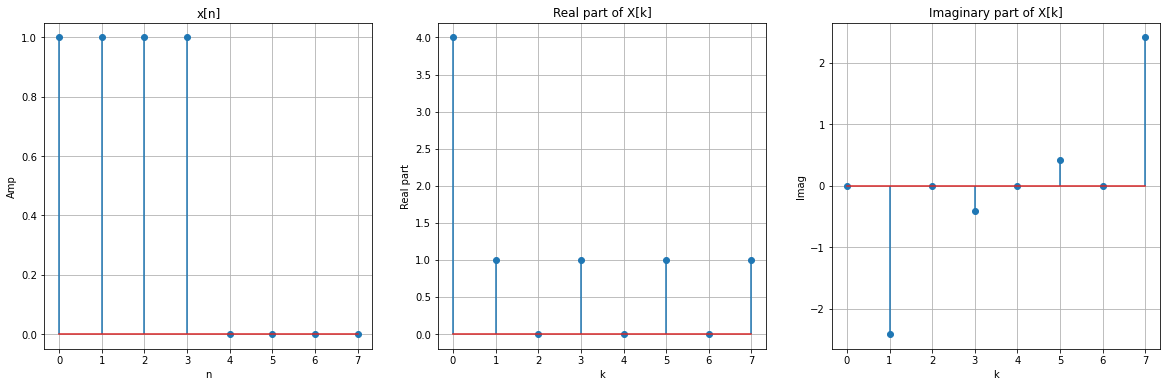

In [14]:
x = [1,1,1,1,0,0,0,0]
x1 = np.zeros(len(x),dtype=np.complex64)
x2 = np.zeros(len(x),dtype=np.complex64)
x3 = np.zeros(len(x),dtype=np.complex64)
tf = np.exp(-1j*2*np.pi/len(x))

begin = time.time()
# Splitting the given data as {(0,4),(2,6),(1,5),(3,7)} 
#computing 2 point DFT of each pair
# 2 point DFT between index 0 and 4
x1[0] = x[0] + x[4]
x1[1] = x[0] - x[4]
# 2 point DFT between index 2 and 6
x1[2] = x[2] + x[6]
x1[3] = x[2] - x[6]
# 2 point DFT between index 1 and 5
x1[4] = x[1] + x[5]
x1[5] = x[1] - x[5]
# 2 point DFT between index 3 and 7
x1[6] = x[3] + x[7]
x1[7] = x[3] - x[7]
# Combining 2 point DFT of even and odd sequences
# Even Seq
x2[0] = x1[0] + (tf**0)*x1[2]
x2[1] = x1[1] + (tf**2)*x1[3]
x2[2] = x1[0] - (tf**0)*x1[2]
x2[3] = x1[1] - (tf**2)*x1[3]
# Odd seq
x2[4] = x1[4] + (tf**0)*x1[6]
x2[5] = x1[5] + (tf**2)*x1[7]
x2[6] = x1[4] - (tf**0)*x1[6]
x2[7] = x1[5] - (tf**2)*x1[7]
# Combining 4 point DFTs 
x3[0] = x2[0] + (tf**0)*x2[4]
x3[1] = x2[1] + (tf**1)*x2[5]
x3[2] = x2[2] + (tf**2)*x2[6]
x3[3] = x2[3] + (tf**3)*x2[7]
x3[4] = x2[0] - (tf**0)*x2[4]
x3[5] = x2[1] - (tf**1)*x2[5]
x3[6] = x2[2] - (tf**2)*x2[6]
x3[7] = x2[3] - (tf**3)*x2[7]
end = time.time()
print('The FFT of the given signal using DIT is:\n',x3)
print(f'\nThe time taken to calculate DIT is:{end-begin}')
#plotting
plt.subplot(131)
plt.stem(np.arange(len(x)),x)
plt.xlabel('n')
plt.ylabel('Amp')
plt.title('x[n]')
plt.grid()
plt.subplot(132)
plt.stem(np.arange(len(x)),x3.real)
plt.xlabel('k')
plt.ylabel('Real part')
plt.title('Real part of X[k]')
plt.grid()          
plt.subplot(133)
plt.stem(np.arange(len(x)),x3.imag)
plt.xlabel('k')
plt.ylabel('Imag')
plt.title('Imaginary part of X[k]')
plt.grid()       
plt.show()

## Q8

The FFT of the given signal using DIF is:
 [4.+0.j         0.+0.j         0.+0.j         0.+0.j
 1.-2.4142137j  1.+0.41421354j 1.-0.41421354j 1.+2.4142137j ]

The time taken to calculate DIF is:0.0004818439483642578


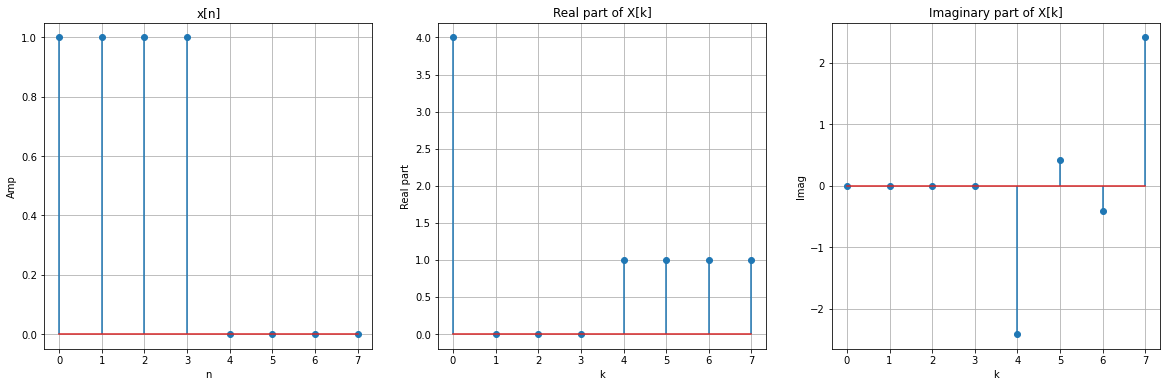

In [15]:
x = [1,1,1,1,0,0,0,0]
x1 = np.zeros(len(x),dtype=np.complex64)
x2 = np.zeros(len(x),dtype=np.complex64)
x3 = np.zeros(len(x),dtype=np.complex64)

start = time.time()
x1[0] = x[0] + x[4]
x1[1] = x[1] +x[5]
x1[2] = x[2] + x[6]
x1[3] = x[3] + x[7]
x1[4] = (x[0] - x[4])*(tf**0)
x1[5] = (x[1] - x[5])*(tf**1)
x1[6] = (x[2] - x[6])*(tf**2)
x1[7] = (x[3] - x[7])*(tf**3)
# Combining 2 point DFT of even and odd sequences
# Even Seq
x2[0] = x1[0] + x1[2]
x2[1] = x1[1] + x1[3]
x2[2] = (x1[0] - x1[2])*(tf**0)
x2[3] = (x1[1] - x1[3])*(tf**2)
# Odd seq
x2[4] = x1[4] + x1[6]
x2[5] = x1[5] + x1[7]
x2[6] = (x1[4] - x1[6])*(tf**0)
x2[7] = (x1[5] - x1[7])*(tf**2)
# 2 point DFT between index 0 and 4
x3[0] = x2[0] + x2[1]
x3[1] = x2[0] - x2[1]

# 2 point DFT between index 2 and 6
x3[2] = x2[2] + x2[3]
x3[3] = x2[2] - x2[3]

# 2 point DFT between index 1 and 5
x3[4] = x2[4] + x2[5]
x3[5] = x2[4] - x2[5]

# 2 point DFT between index 3 and 7
x3[6] = x2[6] + x2[7]
x3[7] = x2[6] - x2[7]

stop = time.time()

print('The FFT of the given signal using DIF is:\n',x3)

print(f'\nThe time taken to calculate DIF is:{stop-start}')

#plotting
plt.subplot(131)
plt.stem(np.arange(len(x)),x)
plt.xlabel('n')
plt.ylabel('Amp')
plt.title('x[n]')
plt.grid()
plt.subplot(132)
plt.stem(np.arange(len(x)),x3.real)
plt.xlabel('k')
plt.ylabel('Real part')
plt.title('Real part of X[k]')
plt.grid()
plt.subplot(133)
plt.stem(np.arange(len(x)),x3.imag)
plt.xlabel('k')
plt.ylabel('Imag')
plt.title('Imaginary part of X[k]')
plt.grid()       
plt.show()

## Q9

In [16]:
x = [1,2,3,1]
y = [1,1,1]
MAX_SIZE = max(len(x),len(y));
# Fn circular convolution
def circularconv(x, h, n, m):
    row_vec = [0] * MAX_SIZE;
    col_vec = [0] * MAX_SIZE;
    out = [0] * MAX_SIZE;
    circular_shift_mat = [[0 for i in range(MAX_SIZE)]for j in range(MAX_SIZE)] ;
    if(n > m ):
        maxSize = n;
    else:
        maxSize = m;
    for i in range(maxSize):
        if (i >= n):
            row_vec[i] = 0;
        else:
            row_vec[i] = x[i];
    for i in range(maxSize):
        if (i >= m):
            col_vec[i] = 0;
        else:
            col_vec[i] = h[i];
    k = 0;
    d = 0;
    for i in range(maxSize):
        curIndex = k - d;
        for j in range(maxSize):
            circular_shift_mat[j][i] = \
            row_vec[curIndex % maxSize];
            curIndex += 1;
        k = maxSize;
        d += 1;
    for i in range(maxSize):
        for j in range(maxSize):
            out[i] += circular_shift_mat[i][j] * col_vec[j];
        print(out[i], end = " ");


x = [ 1,2,3,1];
n = len(x);
h = [ 1,1,1];
m = len(h);
print('Circular Convolution')
circularconv(x, h, n, m);
N = n+m-1
y = np.zeros(N)
N1 = N-n
N2 = N-m
#Padding zeros to x and h to make their length to N
x1 =np.pad(x,(0,N1),'constant')
h1 =np.pad(h,(0,N2),'constant')

#Linear convolution
for n in range (N):
    for k in range (N):
        if n >= k:
             y[n] = np.round(y[n]+x1[n-k]*h1[k],0)
print('\nLinear convolution')
print(y)

Circular Convolution
5 4 6 6 
Linear convolution
[1. 3. 6. 6. 4. 1.]


In [17]:
x = [1,2,3,1]
y = [1,1,1]
z1 = ifft(fft(x,max(len(x),len(y)))*fft(y,max(len(x),len(y)))) 
print('\n')
print('Circular Convolution using fft')
print(np.round(z1.real,0))



Circular Convolution using fft
[5. 4. 6. 6.]


THE END